# Stock Market Prediction using Numerical and Textual Analysis
## Internship on Data Science and Business Analytics

## Author:  Kuzote Lohe

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote 
df = stocks = pd.read_csv(r'C:\Users\Hiu\Desktop\Task 3\GOOG.csv') 
#Show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...,...
2732,2020-11-09,1790.900024,1818.060059,1760.020020,1763.000000,1763.000000,2268300
2733,2020-11-10,1731.089966,1763.000000,1717.300049,1740.390015,1740.390015,2636100
2734,2020-11-11,1750.000000,1764.219971,1747.364990,1752.709961,1752.709961,1264000
2735,2020-11-12,1747.630005,1768.270020,1745.599976,1749.839966,1749.839966,1247500


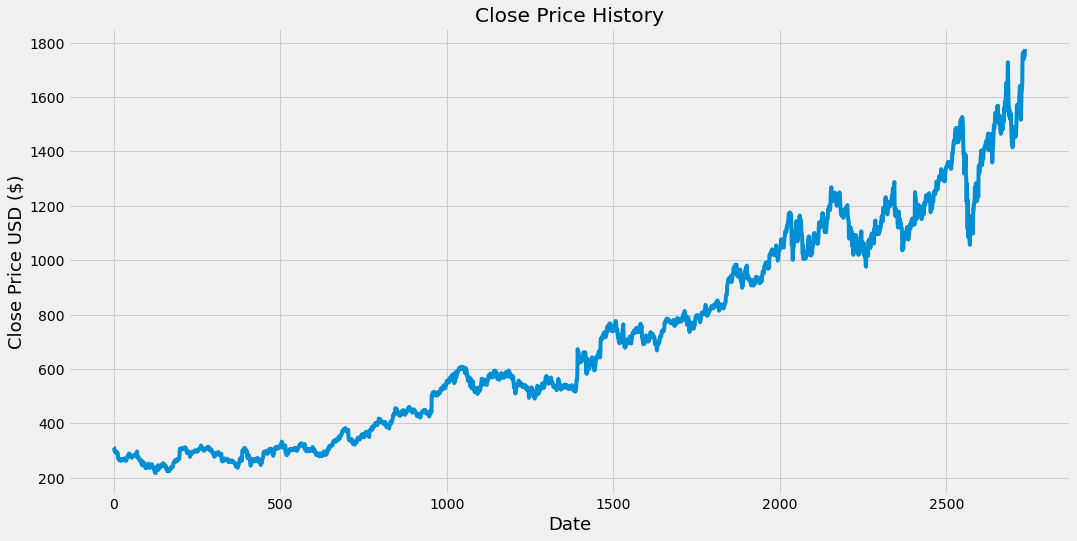

In [3]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [5]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [6]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [7]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [10]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2130/2130 [==============================] - 31s 15ms/step - loss: 7.4169e-04


In [12]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [14]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [16]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

47.95326609180167

<ipython-input-17-c1beac80e8e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


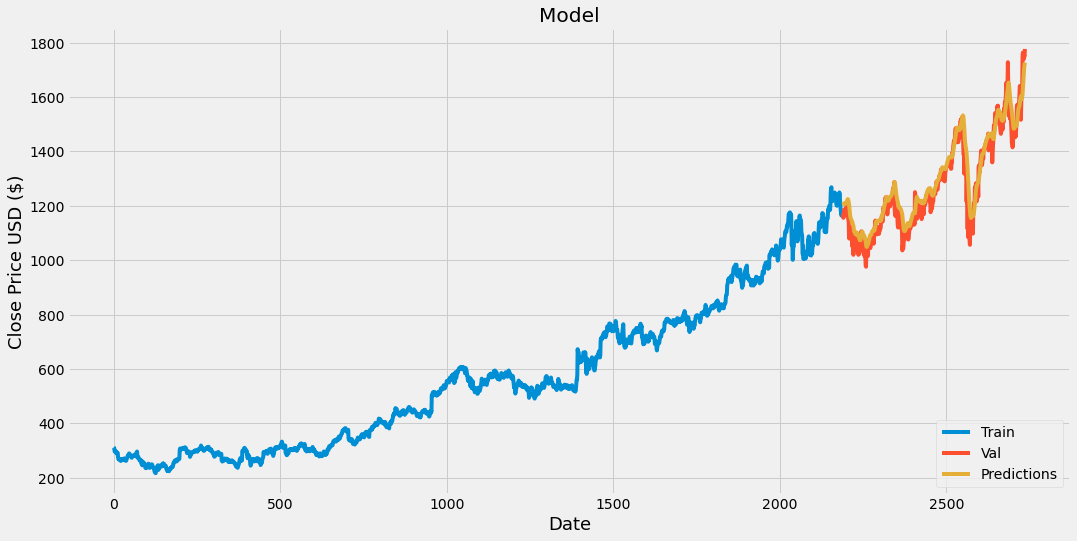

In [17]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
#Show the valid and predicted prices
valid

,Close,Predictions
2190,1172.530029,1214.566650
2191,1156.050049,1212.507568
2192,1161.219971,1209.285278
2193,1171.089966,1206.529053
2194,1186.869995,1205.367188
...,...,...
2732,1763.000000,1678.671509
2733,1740.390015,1698.039185
2734,1752.709961,1710.750854
2735,1749.839966,1720.398193


In [19]:
#Get the quote
google_quote = web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2020-11-10')
#Create a new dataframe
new_df = google_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1710.7511]]


# Texture

In [20]:
news_data = pd.read_csv(r'C:\Users\Hiu\Desktop\Akuzo\Internship\TSF-main\TSF-main\india-news-headlines.csv', error_bad_lines=False)

In [21]:
news_data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


# Data Pre-processing and EDA of News Dataset

In [22]:
news_data['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in news_data['publish_date']])

In [23]:
news_data.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [24]:
news_data['published_date'] = pd.to_datetime(news_data['published_date'])

In [25]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       int64         
 1   headline_category  object        
 2   headline_text      object        
 3   published_date     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 100.6+ MB


In [26]:
news_data = news_data[['published_date', 'headline_text']]

In [27]:
news_data.columns = ['published_date', 'headline']

In [28]:
news_data.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


# Accumulating the headlines having same dates.

In [29]:
dict_news = {}

In [30]:
temp = news_data.loc[0, 'published_date']
temp2 = str(news_data.loc[0, 'headline'])
for x in range(1, len(news_data)):
    if news_data.loc[x, 'published_date']==temp:
        temp2 += '. ' + str(news_data.loc[x, 'headline'])
    else:
        dict_news[news_data.loc[x-1, 'published_date']] = temp2
        temp2 = ""
        temp = news_data.loc[x, 'published_date']

In [31]:
len(dict_news)

7079

In [32]:
indexes = np.arange(0, len(dict_news))

In [33]:
df_news = pd.DataFrame(indexes)

In [34]:
df_news.head()

,0
0,0
1,1
2,2
3,3
4,4


In [35]:
df_news['Published_Date'] = dict_news.keys()

In [36]:
df_news.head()

,0,Published_Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [37]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])

In [38]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [39]:
l[10]

'. japan edge north korea in politically charged opener'

In [40]:
df_news['Headline'] = np.array(l)

In [41]:
df_news.head()

,0,Published_Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [42]:
df_news = df_news.drop(0, axis=1)

# Performing Sentiment Analysis on News Dataset

In [43]:
from textblob import TextBlob

In [44]:
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [45]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [46]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)

In [47]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [48]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [49]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [50]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [51]:
len(df_news)

7079

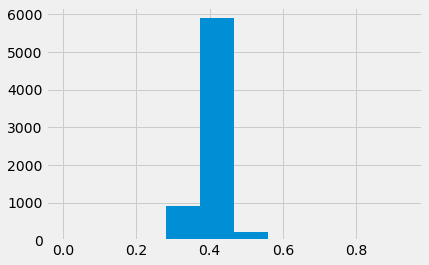

In [52]:
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

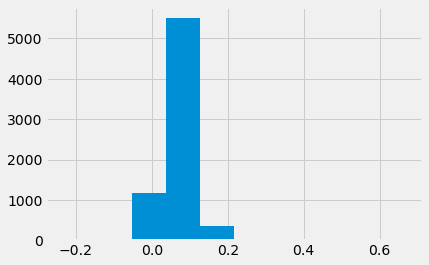

In [53]:
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

In [54]:
import seaborn as sns

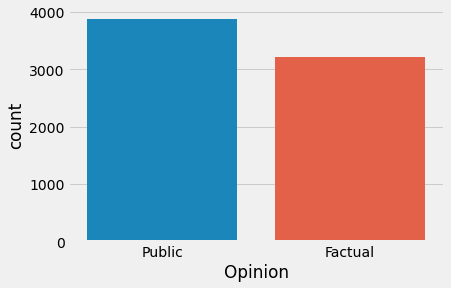

In [55]:
sns.countplot(df_news['Opinion'])

# Stocks Data: Pre-processing and EDA

In [56]:
stocks = pd.read_csv(r'C:\Users\Hiu\Desktop\Task 3\GOOG.csv')

In [57]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900


In [58]:
len(stocks)

2737

In [59]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2737 non-null   object 
 1   Open       2737 non-null   float64
 2   High       2737 non-null   float64
 3   Low        2737 non-null   float64
 4   Close      2737 non-null   float64
 5   Adj Close  2737 non-null   float64
 6   Volume     2737 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 149.8+ KB


In [60]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2.737000e+03
mean,707.977913,714.513030,701.407487,708.175977,708.175977,3.191660e+06
std,381.940155,386.377773,378.126731,382.447984,382.447984,2.656510e+06
min,218.336624,220.314209,216.005356,217.220810,217.220810,7.900000e+03
25%,336.488770,339.228485,334.595856,337.385406,337.385406,1.430200e+06
50%,592.279968,598.008179,588.484192,593.111633,593.111633,2.188200e+06
75%,1046.719971,1058.369995,1032.521973,1044.410034,1044.410034,4.265200e+06
max,1790.900024,1818.060059,1760.020020,1777.020020,1777.020020,2.976060e+07


In [61]:
stocks['HL_pct']=((stocks['High']-stocks['Low'])/stocks['Low'])*100
stocks['PCT_change']=((stocks['Close']-stocks['Open'])/stocks['Open'])*100

In [62]:
stocks = stocks.drop(['Open','High','Close','Low'], axis=1)

In [63]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2010-01-04,312.204773,3927000,0.844224,-0.031905
1,2010-01-05,310.829926,6031900,1.013614,-0.508628
2,2010-01-06,302.994293,7987100,3.215912,-2.812134
3,2010-01-07,295.940735,12876600,2.927530,-2.510665
4,2010-01-08,299.885956,9483900,2.400234,1.692572


In [64]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [65]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2010-01-04,312.204773,3927000,0.844224,-0.031905
1,2010-01-05,310.829926,6031900,1.013614,-0.508628
2,2010-01-06,302.994293,7987100,3.215912,-2.812134
3,2010-01-07,295.940735,12876600,2.927530,-2.510665
4,2010-01-08,299.885956,9483900,2.400234,1.692572


In [66]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

# Merging the News and Stocks Datasets on the basis of Dates

In [67]:
merge_data = df_news.merge(stocks, how='inner', on='Date', left_index = True)

In [68]:
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2010-01-04,. Chor Bazaari top song of 2009. 2010...movies...,0.048007,0.465905,Neutral,Public,312.204773,3927000,0.844224,-0.031905
1,2010-01-05,. MJ's new track leaked on internet. Ranbir's ...,0.011382,0.418044,Neutral,Public,310.829926,6031900,1.013614,-0.508628
2,2010-01-06,. Can a man and woman be just friends?. Aamir;...,0.050457,0.427033,Neutral,Public,302.994293,7987100,3.215912,-2.812134
3,2010-01-07,. Rahman's going green. Fans; forgive Aamir: C...,0.037038,0.404291,Neutral,Public,295.940735,12876600,2.927530,-2.510665
4,2010-01-08,. Bicholim fire cell saved 79 lives in '09. Se...,0.032007,0.379068,Neutral,Factual,299.885956,9483900,2.400234,1.692572


In [69]:
merge_data = merge_data.reset_index()

In [70]:
merge_data.head()

,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,0,2010-01-04,. Chor Bazaari top song of 2009. 2010...movies...,0.048007,0.465905,Neutral,Public,312.204773,3927000,0.844224,-0.031905
1,1,2010-01-05,. MJ's new track leaked on internet. Ranbir's ...,0.011382,0.418044,Neutral,Public,310.829926,6031900,1.013614,-0.508628
2,2,2010-01-06,. Can a man and woman be just friends?. Aamir;...,0.050457,0.427033,Neutral,Public,302.994293,7987100,3.215912,-2.812134
3,3,2010-01-07,. Rahman's going green. Fans; forgive Aamir: C...,0.037038,0.404291,Neutral,Public,295.940735,12876600,2.927530,-2.510665
4,4,2010-01-08,. Bicholim fire cell saved 79 lives in '09. Se...,0.032007,0.379068,Neutral,Factual,299.885956,9483900,2.400234,1.692572


In [71]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         2640 non-null   int64         
 1   Date          2640 non-null   datetime64[ns]
 2   Headline      2640 non-null   object        
 3   Polarity      2640 non-null   float64       
 4   Subjectivity  2640 non-null   float64       
 5   Sentiment     2640 non-null   object        
 6   Opinion       2640 non-null   object        
 7   Adj Close     2640 non-null   float64       
 8   Volume        2640 non-null   int64         
 9   HL_pct        2640 non-null   float64       
 10  PCT_change    2640 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 227.0+ KB


In [72]:
merge_data = merge_data.drop(0)

In [73]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [74]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639 entries, 1 to 2639
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         2639 non-null   int64         
 1   Date          2639 non-null   datetime64[ns]
 2   Headline      2639 non-null   object        
 3   Polarity      2639 non-null   float64       
 4   Subjectivity  2639 non-null   float64       
 5   Sentiment     2639 non-null   object        
 6   Opinion       2639 non-null   object        
 7   Adj Close     2639 non-null   float64       
 8   Volume        2639 non-null   int64         
 9   HL_pct        2639 non-null   float64       
 10  PCT_change    2639 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 247.4+ KB


In [75]:
merge_data = merge_data.reset_index()
merge_data.head()

,level_0,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,1,1,2010-01-05,. MJ's new track leaked on internet. Ranbir's ...,0.011382,0.418044,Neutral,Public,310.829926,6031900,1.013614,-0.508628
1,2,2,2010-01-06,. Can a man and woman be just friends?. Aamir;...,0.050457,0.427033,Neutral,Public,302.994293,7987100,3.215912,-2.812134
2,3,3,2010-01-07,. Rahman's going green. Fans; forgive Aamir: C...,0.037038,0.404291,Neutral,Public,295.940735,12876600,2.927530,-2.510665
3,4,4,2010-01-08,. Bicholim fire cell saved 79 lives in '09. Se...,0.032007,0.379068,Neutral,Factual,299.885956,9483900,2.400234,1.692572
4,5,5,2010-01-11,. Creating a landscape of love and beauty. Bik...,0.038467,0.405701,Neutral,Public,299.432648,14479800,1.754093,-0.554219


In [76]:
merge_data = merge_data.drop(['level_0', 'index'], axis=1)
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2010-01-05,. MJ's new track leaked on internet. Ranbir's ...,0.011382,0.418044,Neutral,Public,310.829926,6031900,1.013614,-0.508628
1,2010-01-06,. Can a man and woman be just friends?. Aamir;...,0.050457,0.427033,Neutral,Public,302.994293,7987100,3.215912,-2.812134
2,2010-01-07,. Rahman's going green. Fans; forgive Aamir: C...,0.037038,0.404291,Neutral,Public,295.940735,12876600,2.927530,-2.510665
3,2010-01-08,. Bicholim fire cell saved 79 lives in '09. Se...,0.032007,0.379068,Neutral,Factual,299.885956,9483900,2.400234,1.692572
4,2010-01-11,. Creating a landscape of love and beauty. Bik...,0.038467,0.405701,Neutral,Public,299.432648,14479800,1.754093,-0.554219


In [77]:
df_needed = merge_data[['Date', 'Polarity', 'Subjectivity','Adj Close','HL_pct','PCT_change']]
df_needed.head()

,Date,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,2010-01-05,0.011382,0.418044,310.829926,1.013614,-0.508628
1,2010-01-06,0.050457,0.427033,302.994293,3.215912,-2.812134
2,2010-01-07,0.037038,0.404291,295.940735,2.927530,-2.510665
3,2010-01-08,0.032007,0.379068,299.885956,2.400234,1.692572
4,2010-01-11,0.038467,0.405701,299.432648,1.754093,-0.554219


In [78]:
df_needed = df_needed.set_index('Date')

In [79]:
df_needed.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2010-01-05,0.011382,0.418044,310.829926,1.013614,-0.508628
2010-01-06,0.050457,0.427033,302.994293,3.215912,-2.812134
2010-01-07,0.037038,0.404291,295.940735,2.927530,-2.510665
2010-01-08,0.032007,0.379068,299.885956,2.400234,1.692572
2010-01-11,0.038467,0.405701,299.432648,1.754093,-0.554219


# Scaling the data using MinMaxScaler to develop a model based on it.

In [80]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index=df_needed.index
new.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2010-01-05,0.183926,0.504397,0.071486,0.051964,0.567920
2010-01-06,0.395381,0.557507,0.065502,0.233663,0.393590
2010-01-07,0.322763,0.423147,0.060116,0.209871,0.416405
2010-01-08,0.295538,0.274127,0.063129,0.166367,0.734508
2010-01-11,0.330499,0.431475,0.062783,0.113057,0.564470


In [81]:
trainSet = new[: int(0.7*(len(new)))]
testSet = new[int(0.7*(len(new))):]

In [82]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [83]:
model = VAR(endog = trainSet)
fit = model.fit()

C:\Users\Hiu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


# Predicted vs Test Set

In [84]:
pred = fit.forecast(fit.y, steps=len(testSet))
predicted = pd.DataFrame(pred, columns=new.columns)

C:\Users\Hiu\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [85]:
predicted.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.456108,0.380699,0.542363,0.075786,0.607135
1,0.491476,0.391126,0.542791,0.080029,0.605083
2,0.498320,0.394096,0.543240,0.081695,0.604745
3,0.499708,0.394756,0.543693,0.082381,0.604621
4,0.499999,0.394876,0.544146,0.082659,0.604567


In [86]:
testSet.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2017-05-08,0.550694,0.381763,0.547611,0.072352,0.673258
2017-05-09,0.270059,0.353175,0.545984,0.039078,0.567803
2017-05-10,0.503618,0.359018,0.543395,0.029335,0.580428
2017-05-11,0.522164,0.356813,0.544785,0.053252,0.649597
2017-05-12,0.321974,0.225193,0.546022,0.018043,0.612019
